In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataset
df=pd.read_csv('layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,New Work,Hamburg,Consumer,400.0,NaN,2024-01-11,Post-IPO,Germany,NaN
1,Playtika,Tel Aviv,Consumer,300.0,0.10,2024-01-11,Post-IPO,Israel,NaN
2,Discord,SF Bay Area,Consumer,170.0,0.17,2024-01-11,Series H,United States,995.0
3,Inmobi,Bengaluru,Marketing,125.0,0.05,2024-01-11,Unknown,India,320.0
4,Audible,New York City,Media,100.0,0.05,2024-01-11,Acquired,United States,14.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3313 non-null   object 
 1   location             3312 non-null   object 
 2   industry             3312 non-null   object 
 3   total_laid_off       2189 non-null   float64
 4   percentage_laid_off  2141 non-null   float64
 5   date                 3313 non-null   object 
 6   stage                3306 non-null   object 
 7   country              3313 non-null   object 
 8   funds_raised         2962 non-null   float64
dtypes: float64(3), object(6)
memory usage: 233.1+ KB


# Data Cleaning

In [3]:
df=df.dropna()
df=df.reset_index(drop=True)

In [197]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Discord,SF Bay Area,Consumer,170.0,0.17,2024-01-11,Series H,United States,995.0
1,Inmobi,Bengaluru,Marketing,125.0,0.05,2024-01-11,Unknown,India,320.0
2,Audible,New York City,Media,100.0,0.05,2024-01-11,Acquired,United States,14.0
3,Sisense,New York City,Data,60.0,0.13,2024-01-11,Series F,United States,274.0
4,Twitch,SF Bay Area,Consumer,500.0,0.35,2024-01-09,Acquired,United States,35.0


# Data Transformation

In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
dtype: object

In [6]:
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month_name()
df=df.drop('date',axis=1)

In [201]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised,Year,Month
0,Discord,SF Bay Area,Consumer,170.0,0.17,Series H,United States,995.0,2024,January
1,Inmobi,Bengaluru,Marketing,125.0,0.05,Unknown,India,320.0,2024,January
2,Audible,New York City,Media,100.0,0.05,Acquired,United States,14.0,2024,January
3,Sisense,New York City,Data,60.0,0.13,Series F,United States,274.0,2024,January
4,Twitch,SF Bay Area,Consumer,500.0,0.35,Acquired,United States,35.0,2024,January


In [7]:
df['Year'].unique()

array([2024, 2023, 2022, 2021, 2020])

## Company with High Layoffs

In [8]:
big_lay_offs=df[['company','country','total_laid_off','Year']][df['total_laid_off']>1000].sort_values(by='total_laid_off',ascending=False).reset_index(drop=True)

In [204]:
big_lay_offs.head()

,company,country,total_laid_off,Year
0,Google,United States,12000.0,2023
1,Meta,United States,11000.0,2022
2,Microsoft,United States,10000.0,2023
3,Amazon,United States,10000.0,2022
4,Ericsson,Sweden,8500.0,2023


In [9]:
# Combining company layoff from all years
big_lay_offs.Year=big_lay_offs.Year.apply(lambda x:str(x))
big_lay_offs=big_lay_offs.groupby('company').agg({'Year':','.join,'total_laid_off':'sum'})


In [10]:
Years=[year for year,df in df.groupby('Year')]
Years

[2020, 2021, 2022, 2023, 2024]

In [11]:
big_lay_offs=big_lay_offs.sort_values('total_laid_off',ascending=False)

In [12]:
big_lay_offs.head()

,Year,total_laid_off
company,,
Amazon,"2022,2023",18000.0
Google,2023,12000.0
Meta,2022,11000.0
Microsoft,2023,10000.0
Ericsson,2023,8500.0


In [13]:
high_lay_offs=big_lay_offs.head(10)
high_lay_offs

,Year,total_laid_off
company,,
Amazon,"2022,2023",18000.0
Google,2023,12000.0
Meta,2022,11000.0
Microsoft,2023,10000.0
Ericsson,2023,8500.0
Salesforce,2023,8000.0
Flink,2023,8000.0
Micron,"2023,2023",7200.0
Uber,"2020,2020",6700.0


# Data Visualization

## Top 10 companies with High Layoffs from 2020-2024

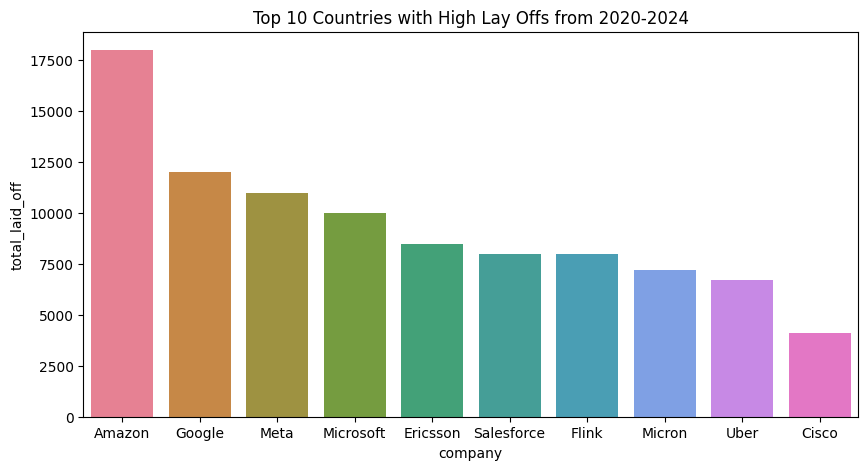

In [14]:
plt.figure(figsize=(10,5))
plt.title("Top 10 Countries with High Lay Offs from 2020-2024")
sns.barplot(x='company',y='total_laid_off',data=high_lay_offs,hue='company',palette="husl")
plt.show()

###  Insight
- High Layoff Company
1. Amazon - 17500+
2. Google - 11000+
3. Meta   - 10000+

In [171]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised,Year,Month
0,Discord,SF Bay Area,Consumer,170.0,0.17,Series H,United States,995.0,2024,January
1,Inmobi,Bengaluru,Marketing,125.0,0.05,Unknown,India,320.0,2024,January
2,Audible,New York City,Media,100.0,0.05,Acquired,United States,14.0,2024,January
3,Sisense,New York City,Data,60.0,0.13,Series F,United States,274.0,2024,January
4,Twitch,SF Bay Area,Consumer,500.0,0.35,Acquired,United States,35.0,2024,January


## Analysis Layoffs 2020-2024

In [15]:
Yearly_distribution_layoffs=df.groupby('Year')['total_laid_off'].sum()
years=[year for year,df in df.groupby('Year')]

Text(0.5, 1.0, 'Total Layoffs 2020-2024')

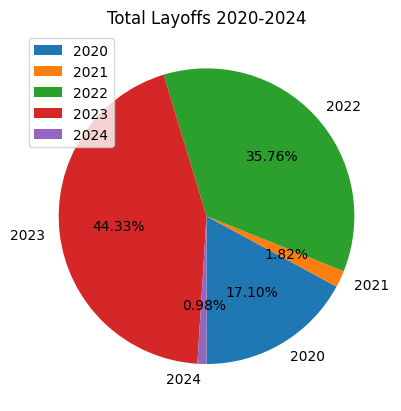

In [16]:
plt.pie(Yearly_distribution_layoffs,labels=years,autopct="%.2f%%",startangle=270)
plt.legend(loc='upper left')
plt.title("Total Layoffs 2020-2024")

###  Year-wise Layoffs
- 2023 (44.3%) and 2022 (35.76%) Highest layoffs

Text(0.5, 1.0, 'Total Layoffs 2020-2024')

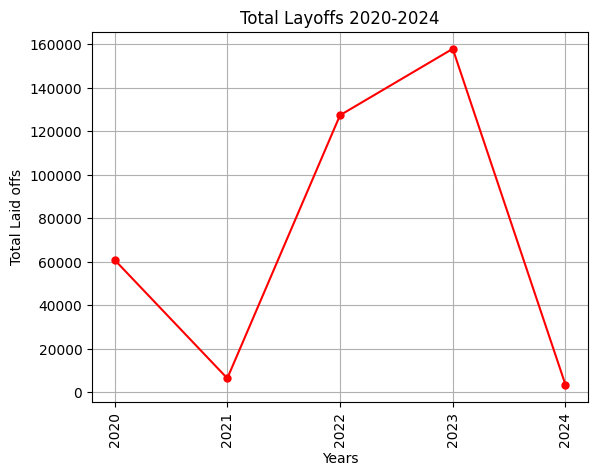

In [17]:
plt.plot(years,Yearly_distribution_layoffs,color='red',marker='.',markersize=10,linestyle='solid')
plt.grid()
plt.xticks(years,rotation='vertical')
plt.xlabel('Years')
plt.ylabel('Total Laid offs')
plt.title("Total Layoffs 2020-2024")

In [18]:
# Analysis of Company layoff multile years
company_count=df.groupby('company').size()

In [123]:
company_count

company
#Paid           1
&Open           1
10X Genomics    1
1stdibs         1
23andMe         2
               ..
iFood           1
iPrice Group    1
iRobot          2
nCino           1
uShip           1
Length: 1135, dtype: int64

## Analysis of Layoffs  in Multiple Years

In [19]:
repeated_company=df[df['company'].isin(company_count[company_count>1].index)]

In [20]:
repeated_company.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised,Year,Month
0,Discord,SF Bay Area,Consumer,170.0,0.17,Series H,United States,995.0,2024,January
3,Sisense,New York City,Data,60.0,0.13,Series F,United States,274.0,2024,January
8,Unity,SF Bay Area,Other,1800.0,0.25,Post-IPO,United States,1300.0,2024,January
10,Pitch,Berlin,Other,80.0,0.67,Series B,Germany,138.0,2024,January
15,Frontdesk,Milwaukee,Travel,200.0,1.00,Unknown,United States,26.0,2024,January


In [21]:
l=['Amazon','Salesforce','Twitter','Swiggy','Better.com','Coinbase','Groupon','DocuSign',
   'Katerra','Lyft','Wayfair','Rivian','Better.com','Unity','Twilio','Splunk','Zillow',
   'Stitch Fix','Redfin','Coinbase',]
repeated_company=repeated_company[repeated_company['company'].isin(l)]

In [22]:
df_pivot=repeated_company.pivot_table(index='company',columns='Year',values='total_laid_off',aggfunc='sum')

In [ ]:
df_pivot

Text(0.5, 1.0, 'Layoff of Company in Multiple Years')

<Figure size 2000x200 with 0 Axes>

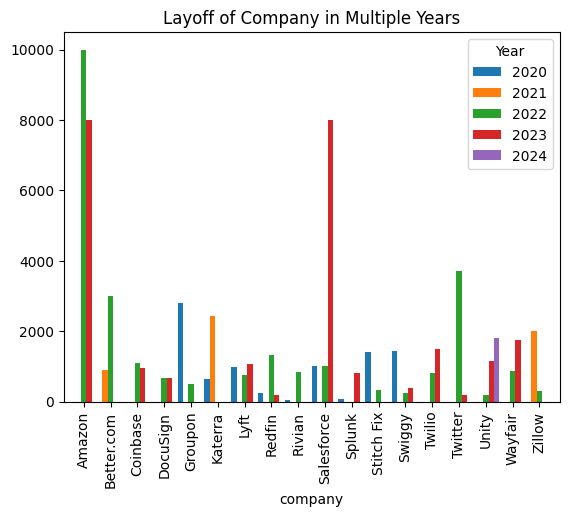

In [23]:
plt.figure(figsize=(20,2))
df_pivot.plot(kind='bar',width=1)
plt.title('Layoff of Company in Multiple Years')

### Analysis of Year wise Layoffs

In [24]:
df_2020=df[df['Year']==2020].reset_index(drop=True)
df_2021=df[df['Year']==2021].reset_index(drop=True)
df_2022=df[df['Year']==2022].reset_index(drop=True)
df_2023=df[df['Year']==2023].reset_index(drop=True)
df_2024=df[df['Year']==2024].reset_index(drop=True)   

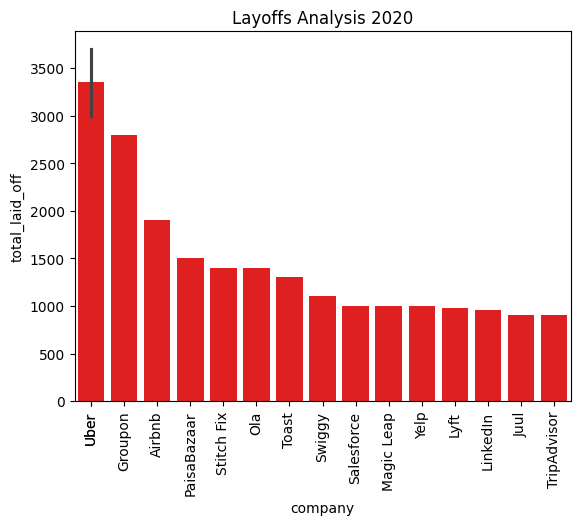

In [25]:
analysis_2020=df_2020[df_2020['total_laid_off']>800].sort_values('total_laid_off',ascending=False).reset_index(drop=True)
sns.barplot(x='company',y='total_laid_off',data=analysis_2020,color='red')
sns.set_context('notebook')
plt.xticks(analysis_2020['company'],rotation='vertical')
plt.title('Layoffs Analysis 2020')
plt.show()

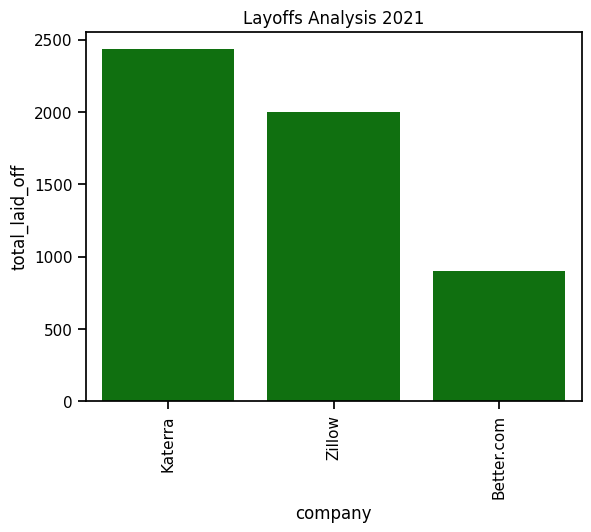

In [26]:
analysis_2021=df_2021[df_2021['total_laid_off']>800].sort_values('total_laid_off',ascending=False).reset_index(drop=True)
sns.barplot(x='company',y='total_laid_off',data=analysis_2021,color='green')
sns.set_context('notebook')
plt.xticks(analysis_2021['company'],rotation='vertical')
plt.title('Layoffs Analysis 2021')
plt.show()

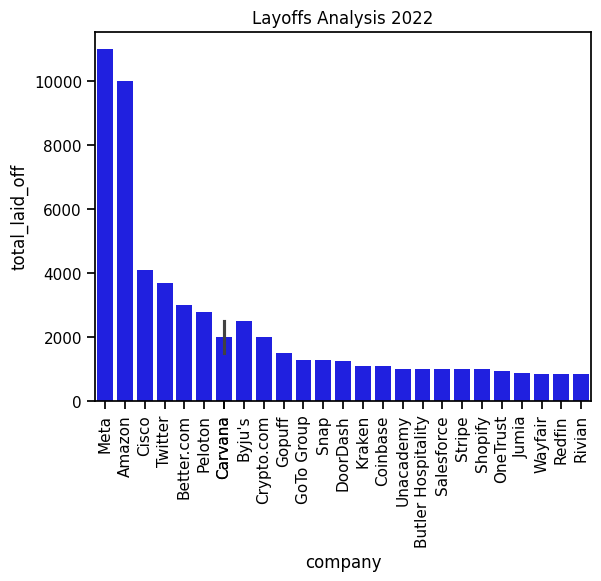

In [27]:
analysis_2022=df_2022[df_2022['total_laid_off']>800].sort_values('total_laid_off',ascending=False).reset_index(drop=True)
sns.barplot(x='company',y='total_laid_off',data=analysis_2022,color='blue')
sns.set_context('notebook')
plt.xticks(analysis_2022['company'],rotation='vertical')
plt.title('Layoffs Analysis 2022')
plt.show()

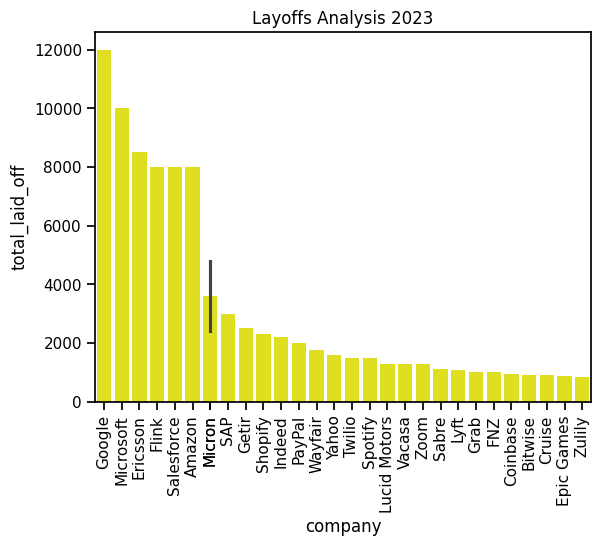

In [28]:
analysis_2023=df_2023[df_2023['total_laid_off']>800].sort_values('total_laid_off',ascending=False).reset_index(drop=True)
sns.barplot(x='company',y='total_laid_off',data=analysis_2023,color='yellow')
sns.set_context('notebook')
plt.xticks(analysis_2023['company'],rotation='vertical')
plt.title('Layoffs Analysis 2023')
plt.show()

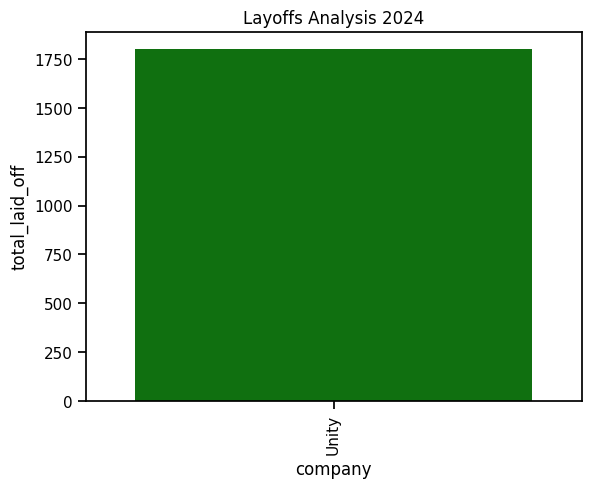

In [29]:
analysis_2024=df_2024[df_2024['total_laid_off']>800].sort_values('total_laid_off',ascending=False).reset_index(drop=True)
sns.barplot(x='company',y='total_laid_off',data=analysis_2024,color='green')
plt.xticks(analysis_2024['company'],rotation='vertical')
plt.title('Layoffs Analysis 2024')
plt.show()

## Analysis of Industry-wise Layoffs

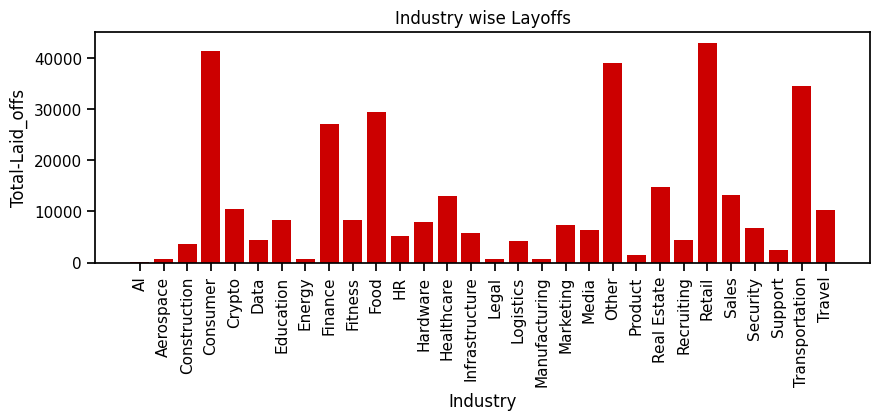

In [32]:
industries=[industry for industry,df in df.groupby('industry')]
industry_layoffs=df.groupby('industry')['total_laid_off'].sum()
plt.figure(figsize=(10,3))
plt.bar(industries,industry_layoffs,color='#CC0000')
plt.title('Industry wise Layoffs') 
plt.xticks(industries,rotation='vertical')
plt.xlabel('Industry')
plt.ylabel('Total-Laid_offs')
plt.show()

## Analysis of Country-wise Layoffs

In [33]:
low_layoffs=df.groupby('country')['total_laid_off'].sum()
low_layoffs_countries=list(low_layoffs[low_layoffs<1000].index)

In [34]:
low_layoffs_countries
country_data=df
country_data['country']=country_data['country'].replace(low_layoffs_countries,"Other")

In [ ]:
country_data

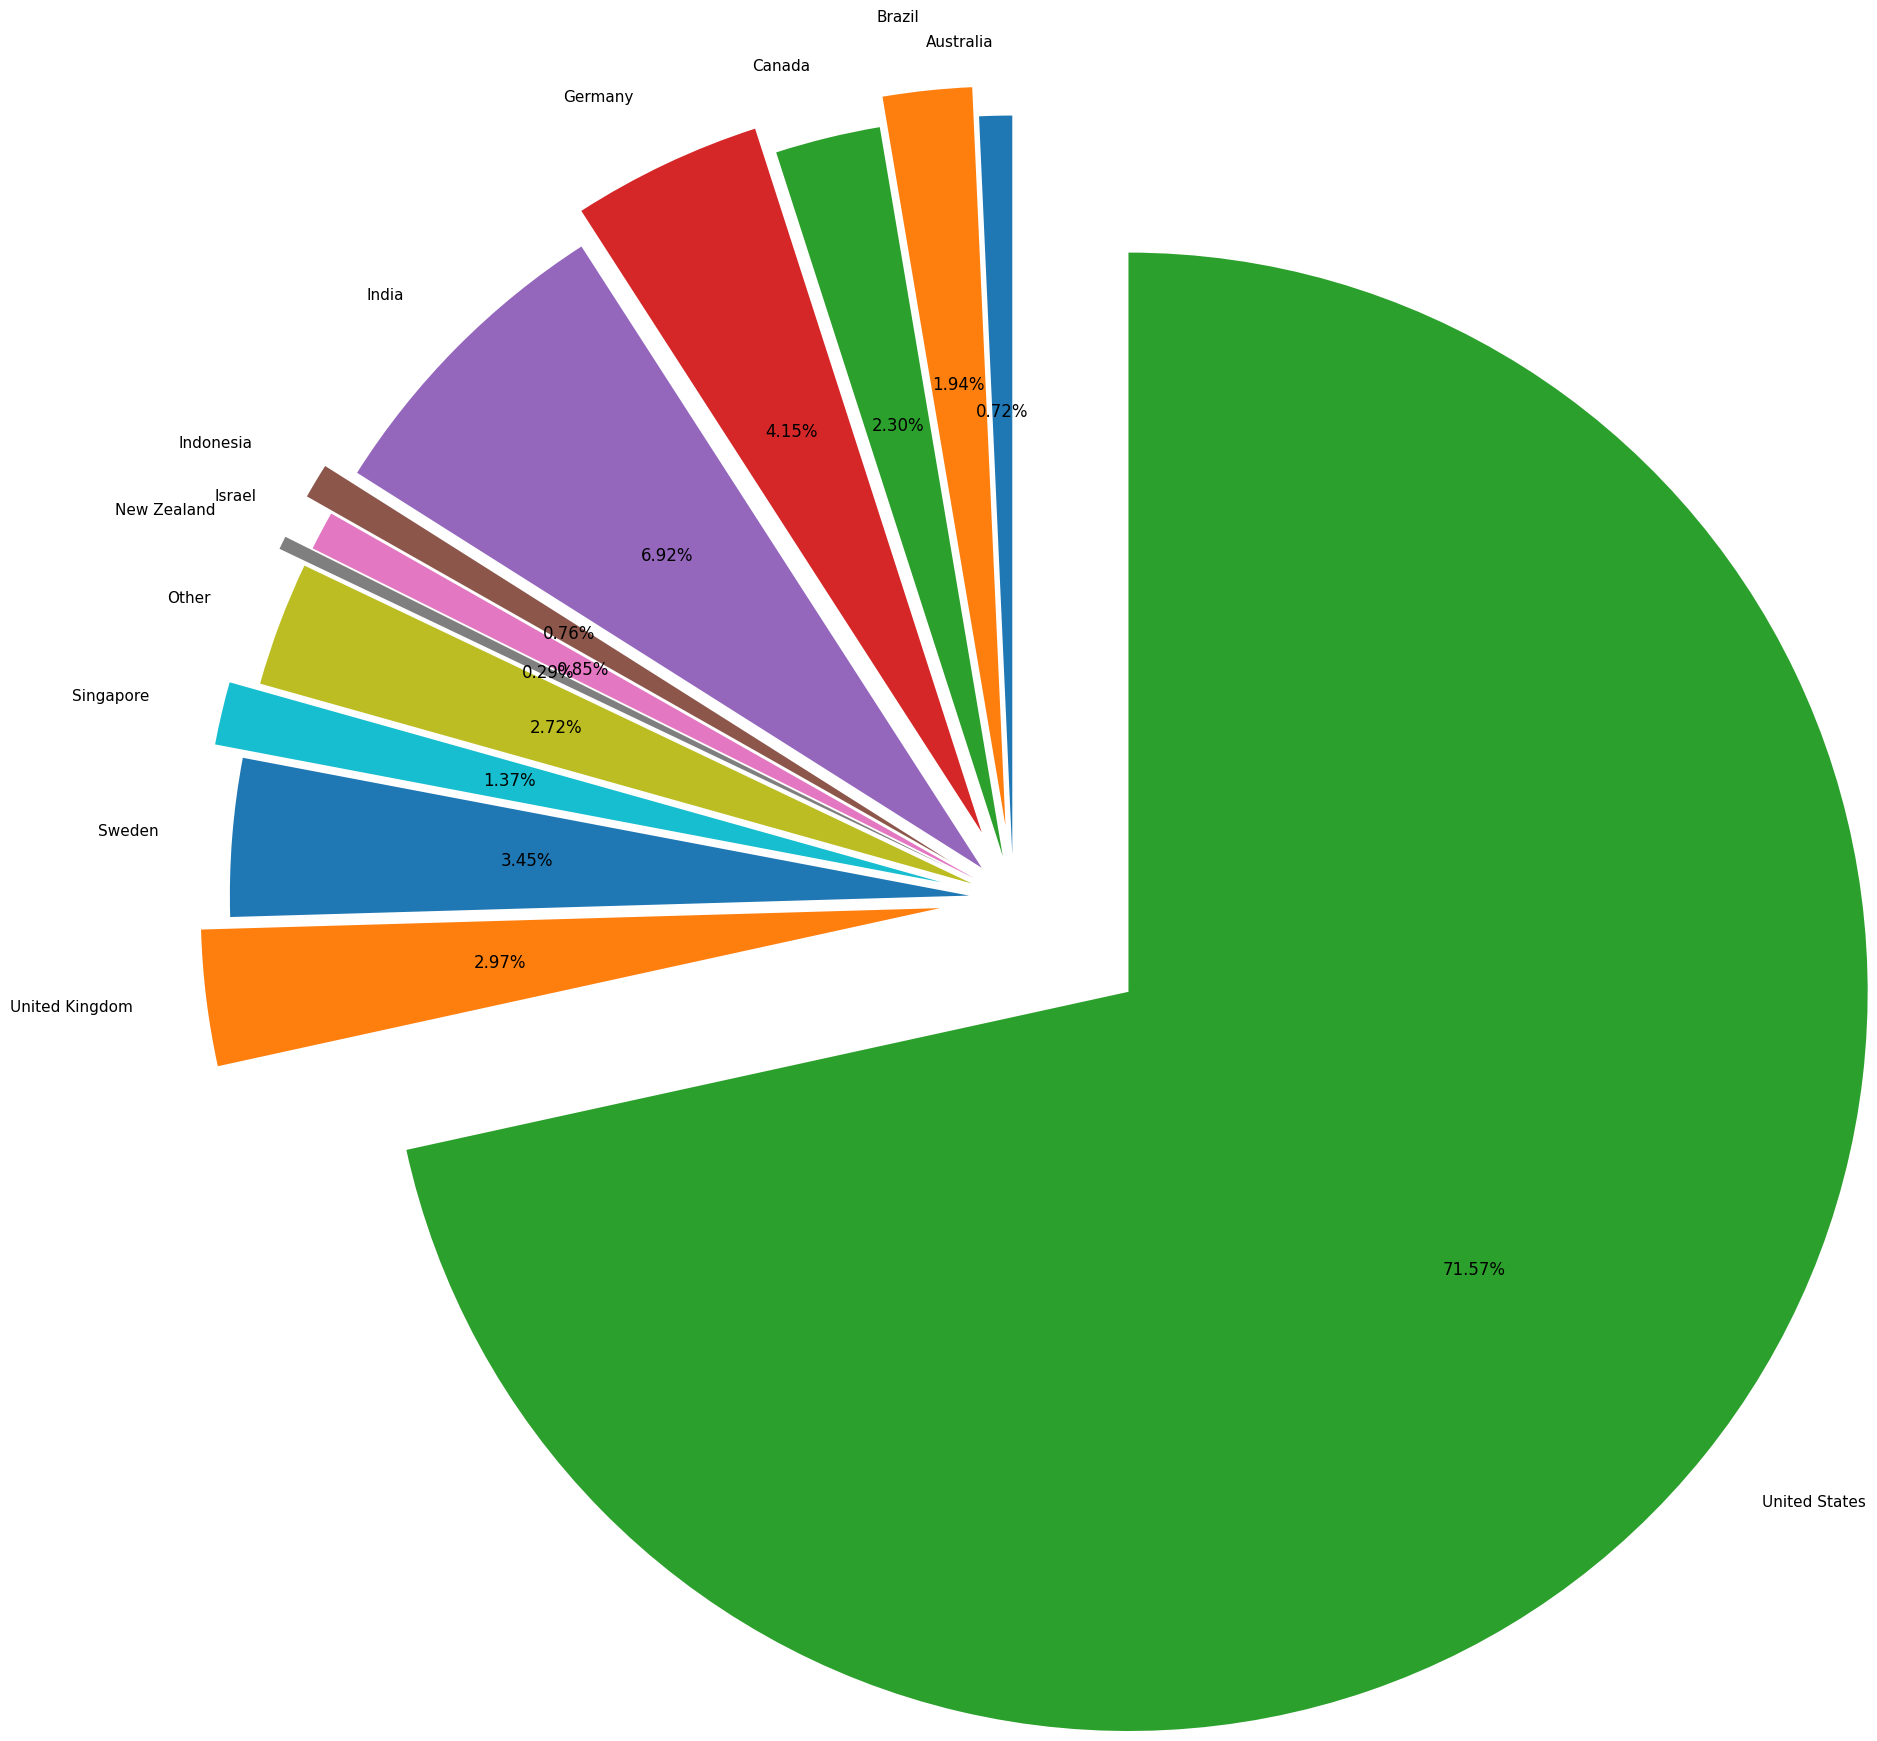

<Figure size 1000x400 with 0 Axes>

In [37]:
countries=[country for country,country_data in country_data.groupby('country')]
country_layoffs=country_data.groupby('country')['total_laid_off'].sum()
plt.pie(country_layoffs,labels=countries,autopct="%.2f%%",startangle=90,radius=5,explode=[.3,.5,.3,.5,.3,.5,.3,.5,.3,.5,.3,.5,1])
plt.figure(figsize=(10,4))
plt.show()
country_layoffs
plt.show()

## Analysis of Stages-wise Layoffs

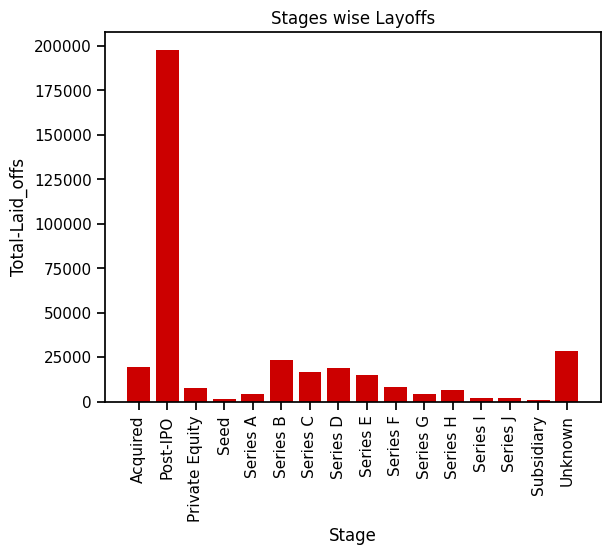

In [38]:
stages=[stage for stage,df in df.groupby('stage')]
stages_layoffs=df.groupby('stage')['total_laid_off'].sum()
plt.bar(stages,stages_layoffs,color='#CC0000')
plt.title('Stages wise Layoffs') 
plt.xticks(stages,rotation='vertical')
plt.xlabel('Stage')
plt.ylabel('Total-Laid_offs')
plt.show()

## Analysis Indian companies Layoffs Monthly

In [39]:
df_indian_companies=df[['company','total_laid_off','Year']][df['country']=='India']

In [ ]:
df_indian_companies

In [40]:
df_indian_companies['Year']=df_indian_companies['Year'].apply(lambda x:str(x))

In [41]:
df_indian_companies=df_indian_companies.groupby('company').agg({'Year':','.join,'total_laid_off':'sum'}).reset_index()

In [42]:
df_indian_companies=df_indian_companies.sort_values(by='total_laid_off',ascending=False).head(20)

In [252]:
# df_indian_companies=df_indian_companies.drop('Year',axis=1)

In [43]:
df_indian_companies=df_indian_companies.reset_index()

Text(0.5, 1.0, 'Indian Companies Layoffs')

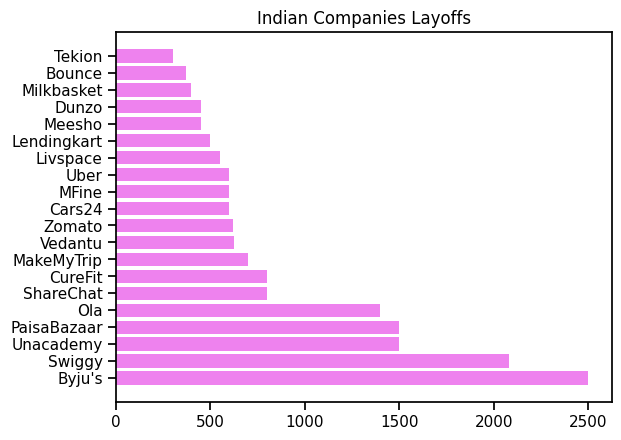

In [44]:
plt.barh(df_indian_companies['company'],df_indian_companies['total_laid_off'],color='violet')
plt.title('Indian Companies Layoffs')

## Analysis Month-wise layoffs

In [45]:
Month=df['Month'].unique()
Month

array(['January', 'December', 'November', 'October', 'September',
       'August', 'July', 'June', 'May', 'April', 'March', 'February'],
      dtype=object)

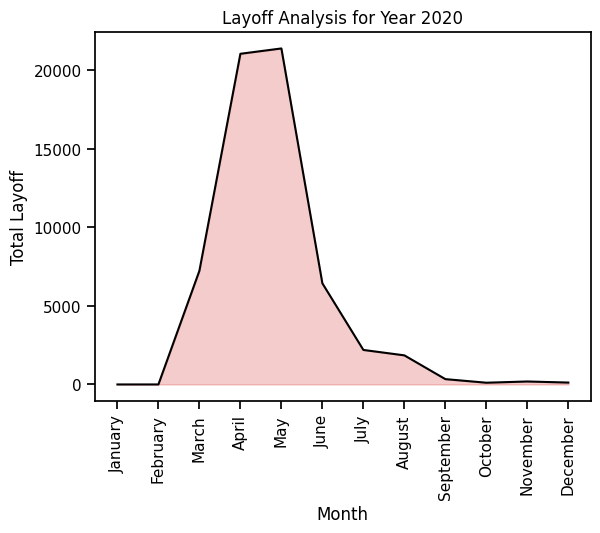

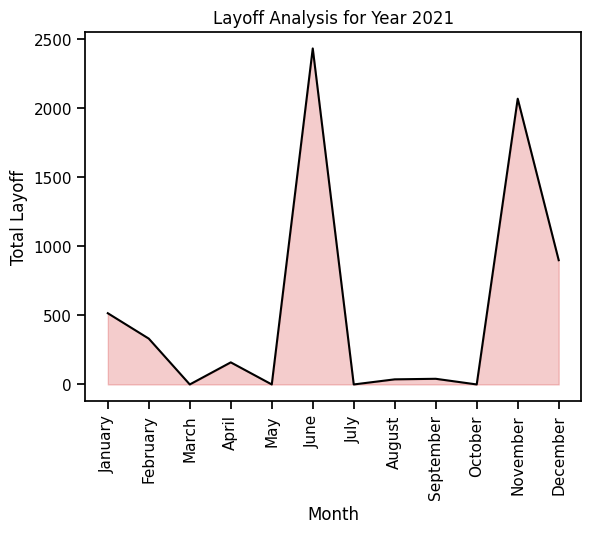

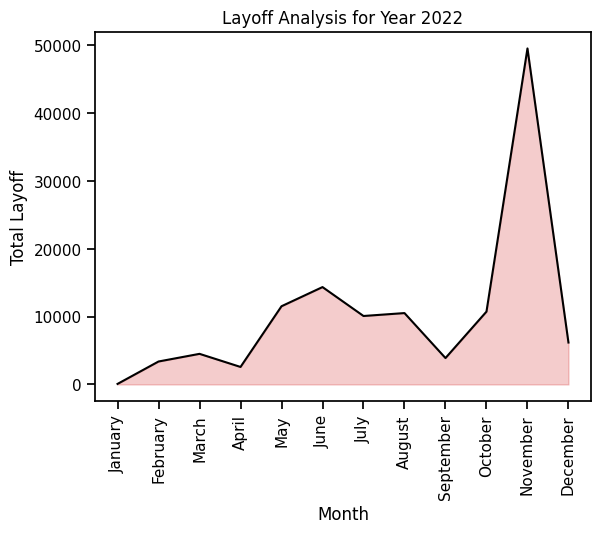

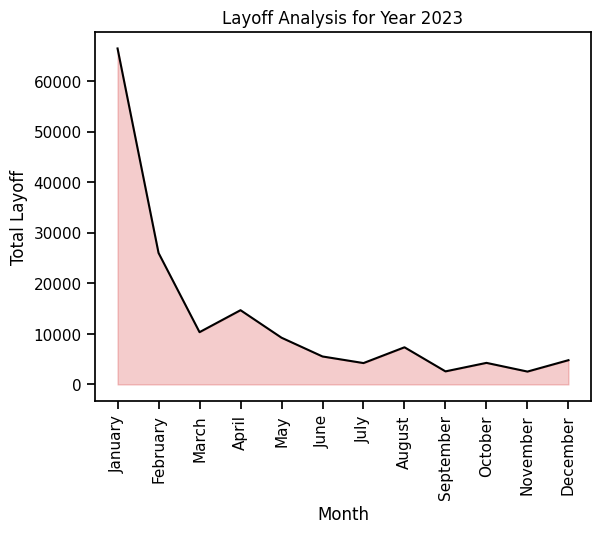

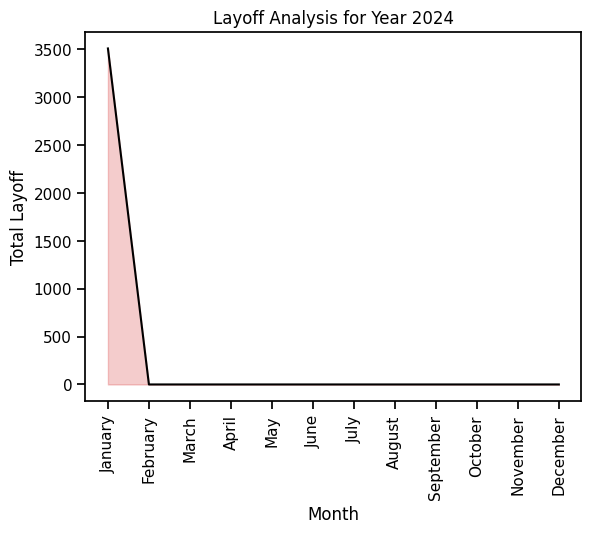

In [47]:
analysis_year = df.groupby('Year')
for year, dfx in analysis_year:
    Months=['January', 'February', 'March','April','May', 'June','July','August','September','October','November','December']
    layoff_permonth=dfx.groupby('Month')['total_laid_off'].sum()
    layoff_permonth=layoff_permonth.reindex(Months,fill_value=0)

    # plt.figure(figsize=(10,4))
    plt.plot(Months,layoff_permonth,color='k')
    plt.fill_between(Months,layoff_permonth,color='#CC0000',alpha=0.2)
    plt.xticks(Months,rotation='vertical')
    plt.xlabel("Month")
    plt.ylabel('Total Layoff')
    plt.title(f"Layoff Analysis for Year {year}")
    plt.show()

# Insights

**High Layoffs Companies from 2020-2024**
1. Amazon
2. Google
3. Meta
4. Microsoft

**Companies Layoff Multiples Years**
1. Amazon-2
2. SaleaForce-3
3. Twitter-2
4. Unity-3

**Year with High Layoffs**
- 2023 44.3%
- 2022 35.7%

**Company with High Layoff in 2020**
1. Uber
2. Groupon
3. Airbnb
4. PaisaBazaar

**Company with High Layoff in 2021**
1. Katerra
2. Zellow
3. Better.com

**Company with High Layoff in 2022**
1. Meta
2. Amazon
3. Cisco
4. Twitter

**Company with High Layoff in 2023**
1. Google
2. Microsoft
3. Ericsson
4. Flink

**Company with High Layoff in 2024**
1. Unity

**Industry with High Layoffs**
1. Consumer
2. Retail
3. Other
4. Transportation
5. Food
6. Finance

**Country with High Layoffs**
1. United States  71.4%
2. India          6.97%
3. Germany        4.15%
4. Sweden         3.45%
5. United Kingdom 2.97%

**HighLayoffs based on Company Stages**
1. Post-IPO
2. Other
3. Series-B
4. Series-D
5. Acquired

**Indian Companies with High Layoffs**
1. Byju
2. Swiggy
3. Unacademy
4. PaisaBazaar
5. Ola